In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib 
import joblib

In [2]:
def take_log(df):
    
    # take log of data
    df['Adj Close'] = np.log(df['Adj Close'])
    
    return df

In [3]:
def get_deltas(df):
    vals = df['Adj Close']
    deltas = [vals[i+1] - vals[i] for i in range(len(vals)-1)]
    deltas.append(np.nan)
    df['Adj Close'] = deltas
    df.to_csv('../data/processed/deltas.csv')
    return df, deltas

In [4]:
def scale_data(df):
    scaler = MinMaxScaler(feature_range = (0, 1))
    df['Adj Close'] = scaler.fit_transform(df[['Adj Close']])
    # save scaler to use later when interpretting predictions
    joblib.dump(scaler, '../models/MinMaxScaler.save')
    return df

In [6]:
# raw data file path
RAW_DATA_FILE_PATH = "~/springboard1/capstone2/TimeSeries/data/raw/raw.csv"

# read csv data from
raw_df = pd.read_csv(RAW_DATA_FILE_PATH, index_col=0, parse_dates=['Date'])

# inspect data
raw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-04-12,11.117037,13.700741,11.099259,13.333333,13.333333,47796700
2002-04-15,13.437037,14.160000,12.802963,13.395555,13.395555,8215600
2002-04-16,13.362963,13.629630,12.808888,13.573334,13.573334,3956800
2002-04-17,13.570371,13.733334,13.093333,13.362963,13.362963,2886400
2002-04-18,13.383703,13.386666,12.693334,13.096296,13.096296,2856600
...,...,...,...,...,...,...
2020-05-20,9.120000,9.420000,9.060000,9.190000,9.190000,16994700
2020-05-21,9.270000,9.640000,9.200000,9.420000,9.420000,12811000
2020-05-22,9.590000,9.650000,9.070000,9.240000,9.240000,11592600


In [8]:
# slice Adj Close column
adj_close_df = raw_df.iloc[:,4:5]
adj_close_df

,Adj Close
Date,
2002-04-12,13.333333
2002-04-15,13.395555
2002-04-16,13.573334
2002-04-17,13.362963
2002-04-18,13.096296
...,...
2020-05-20,9.190000
2020-05-21,9.420000
2020-05-22,9.240000


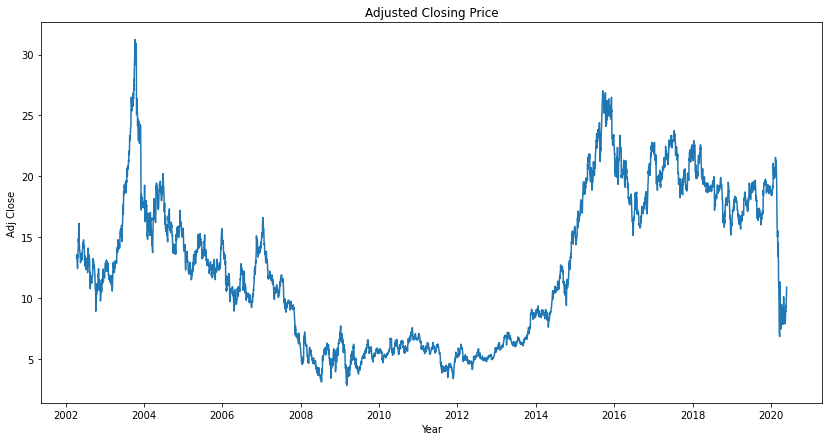

In [9]:
# plot adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(adj_close_df)
_ = plt.title('Adjusted Closing Price')
_ = plt.xlabel('Year')
_ = plt.ylabel('Adj Close')
plt.show()

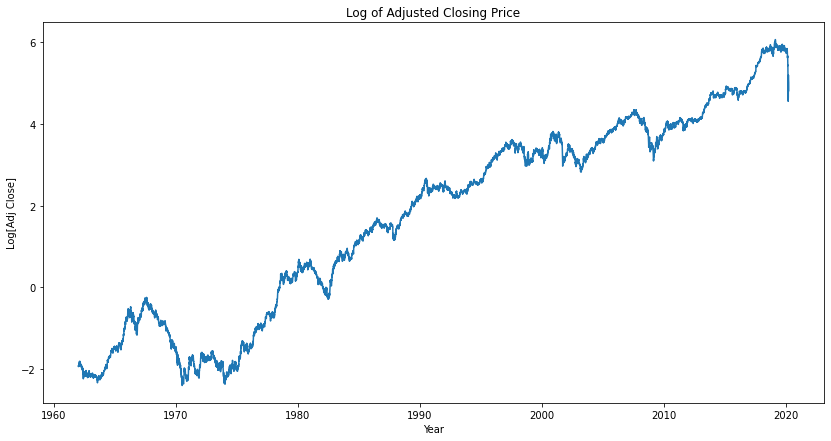

In [8]:
# take the log change if the price
#log_scaled_adj_close, deltas = get_deltas(adj_close_df)
#log_scaled_adj_close = take_log(log_scaled_adj_close)
log_scaled_adj_close = take_log(adj_close_df)
# plot adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(log_scaled_adj_close)
_ = plt.title('Log of Adjusted Closing Price')
_ = plt.xlabel('Year')
_ = plt.ylabel('Log[Adj Close]')
plt.show()

In [9]:
log_scaled_adj_close, deltas = get_deltas(log_scaled_adj_close)
#log_scaled_adj_close = scale_data(log_scaled_adj_close)

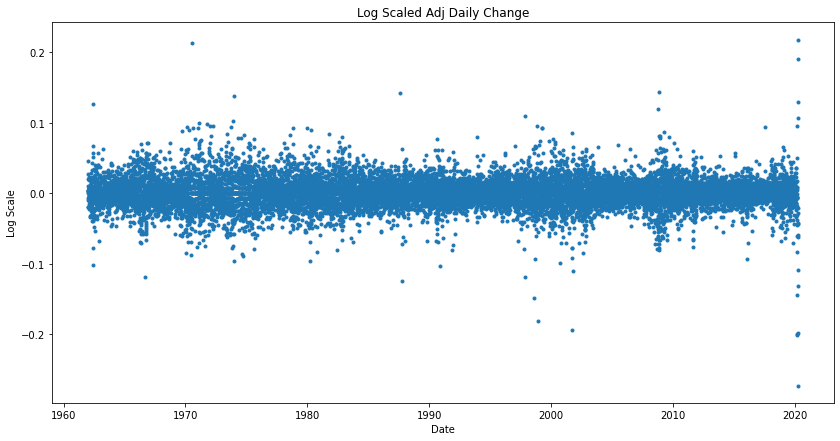

In [10]:
# plot log scaled adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(log_scaled_adj_close, linestyle='None', marker='.')
_ = plt.title('Log Scaled Adj Daily Change')
_ = plt.xlabel('Date')
_ = plt.ylabel('Log Scale')
plt.show()
    

/home/alhalarewicz/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alhalarewicz/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


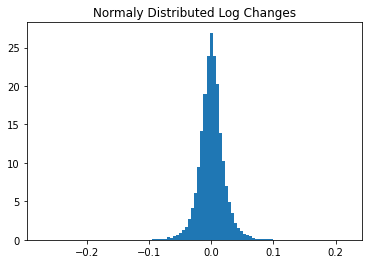

In [11]:
_ = plt.hist(deltas, bins = 100, density=True)
_ = plt.title('Normaly Distributed Log Changes')
plt.show()

In [12]:
# see 20:30 for structuring time series data for 5 trailing days

def create_previous_days(df, col_name):
    
    """
    Create columns containing the stock price for each of the previous five days.
    
    Params
    ------
    DataFrame containing stock prices for consecutive days
    
    Return
    ------
    A times series formatted DataFrame
    """
    
    back_1 = np.nan
    back_2 = np.nan
    back_3 = np.nan
    back_4 = np.nan
    back_5 = np.nan
    
    back_1_col = []
    back_2_col = []
    back_3_col = []
    back_4_col = []
    back_5_col = []
    
    for today in df[col_name]:
        
        # append previous values
        back_1_col.append(back_1)
        back_2_col.append(back_2)
        back_3_col.append(back_3)
        back_4_col.append(back_4)
        back_5_col.append(back_5)
        
        # set values for next day to step forward
        back_5 = back_4
        back_4 = back_3
        back_3 = back_2
        back_2 = back_1
        back_1 = today
        
    # append columns to time_series dataframe
    df['back_5'] = back_5_col
    df['back_4'] = back_4_col
    df['back_3'] = back_3_col
    df['back_2'] = back_2_col
    df['back_1'] = back_1_col

    # order columns chronologically
    df = df[['back_5', 'back_4', 'back_3', 'back_2', 'back_1', col_name]]
        
    return df
    
        
        
previous_df = create_previous_days(log_scaled_adj_close, 'Adj Close')
previous_df

,back_5,back_4,back_3,back_2,back_1,Adj Close
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,0.019803
1962-01-03,NaN,NaN,NaN,NaN,0.019803,-0.009852
1962-01-04,NaN,NaN,NaN,0.019803,-0.009852,-0.020001
1962-01-05,NaN,NaN,0.019803,-0.009852,-0.020001,0.002522
1962-01-08,NaN,0.019803,-0.009852,-0.020001,0.002522,0.002516
...,...,...,...,...,...,...
2020-03-27,0.105866,0.189679,0.217677,0.128803,-0.108411,-0.061875
2020-03-30,0.189679,0.217677,0.128803,-0.108411,-0.061875,-0.020835
2020-03-31,0.217677,0.128803,-0.108411,-0.061875,-0.020835,-0.131981


In [13]:
def create_future_days(df, col_name):
    
    df = df.sort_index(ascending=False)
    
    next_1 = np.nan
    next_2 = np.nan
    next_3 = np.nan
    next_4 = np.nan
    next_5 = np.nan
    
    next_1_col = []
    next_2_col = []
    next_3_col = []
    next_4_col = []
    next_5_col = []
    
    for today in df[col_name]:
        
        next_1_col.append(next_1)
        next_2_col.append(next_2)
        next_3_col.append(next_3)
        next_4_col.append(next_4)
        next_5_col.append(next_5)
        
        next_5 = next_4
        next_4 = next_3
        next_3 = next_2
        next_2 = next_1
        next_1 = today
        
    df['next_1'] = next_1_col
    df['next_2'] = next_2_col
    df['next_3'] = next_3_col
    df['next_4'] = next_4_col
    df['next_5'] = next_5_col
    
    df = df.sort_index(ascending=True)
    
    return df

future_df = create_future_days(previous_df, 'Adj Close')
future_df

,back_5,back_4,back_3,back_2,back_1,Adj Close,next_1,next_2,next_3,next_4,next_5
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,0.019803,-0.009852,-0.020001,0.002522,0.002516,0.000000
1962-01-03,NaN,NaN,NaN,NaN,0.019803,-0.009852,-0.020001,0.002522,0.002516,0.000000,0.010000
1962-01-04,NaN,NaN,NaN,0.019803,-0.009852,-0.020001,0.002522,0.002516,0.000000,0.010000,0.026997
1962-01-05,NaN,NaN,0.019803,-0.009852,-0.020001,0.002522,0.002516,0.000000,0.010000,0.026997,-0.019561
1962-01-08,NaN,0.019803,-0.009852,-0.020001,0.002522,0.002516,0.000000,0.010000,0.026997,-0.019561,-0.007436
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,0.105866,0.189679,0.217677,0.128803,-0.108411,-0.061875,-0.020835,-0.131981,-0.058528,NaN,NaN
2020-03-30,0.189679,0.217677,0.128803,-0.108411,-0.061875,-0.020835,-0.131981,-0.058528,NaN,NaN,NaN
2020-03-31,0.217677,0.128803,-0.108411,-0.061875,-0.020835,-0.131981,-0.058528,NaN,NaN,NaN,NaN


In [14]:
def create_time_series(df, col_name='Adj Close'):
    df = create_previous_days(df, col_name)
    #df = create_future_days(df, col_name)
    return df

time_series_df = create_time_series(log_scaled_adj_close, 'Adj Close')
time_series_df

,back_5,back_4,back_3,back_2,back_1,Adj Close
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,0.019803
1962-01-03,NaN,NaN,NaN,NaN,0.019803,-0.009852
1962-01-04,NaN,NaN,NaN,0.019803,-0.009852,-0.020001
1962-01-05,NaN,NaN,0.019803,-0.009852,-0.020001,0.002522
1962-01-08,NaN,0.019803,-0.009852,-0.020001,0.002522,0.002516
...,...,...,...,...,...,...
2020-03-27,0.105866,0.189679,0.217677,0.128803,-0.108411,-0.061875
2020-03-30,0.189679,0.217677,0.128803,-0.108411,-0.061875,-0.020835
2020-03-31,0.217677,0.128803,-0.108411,-0.061875,-0.020835,-0.131981


In [15]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14664 entries, 1962-01-02 to 2020-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   back_5     14659 non-null  float64
 1   back_4     14660 non-null  float64
 2   back_3     14661 non-null  float64
 3   back_2     14662 non-null  float64
 4   back_1     14663 non-null  float64
 5   Adj Close  14663 non-null  float64
dtypes: float64(6)
memory usage: 1.4 MB


In [16]:
time_series_df.to_csv('../data/interim/time_series.csv')